In [15]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions, closest_color, convert_array_to_hsl, circle_fitting_and_regression
from module_behavioral.utility import select_emotions, set_significance
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import kendalltau

In [2]:
## load data from experiment one,we only need to use the emotion embedding
d = DataLoader(context=1, location='../data/behavioral/processeddata/1/')
d.load_emotion()

In [3]:
emotion_embedding = reduce_dimensions(d.average_emotion_matrix)

In [4]:
d1 = DataLoader(context=4, location='../data/behavioral/processeddata/4/')
d1.load_rgb_emotion_color_association()


In [5]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

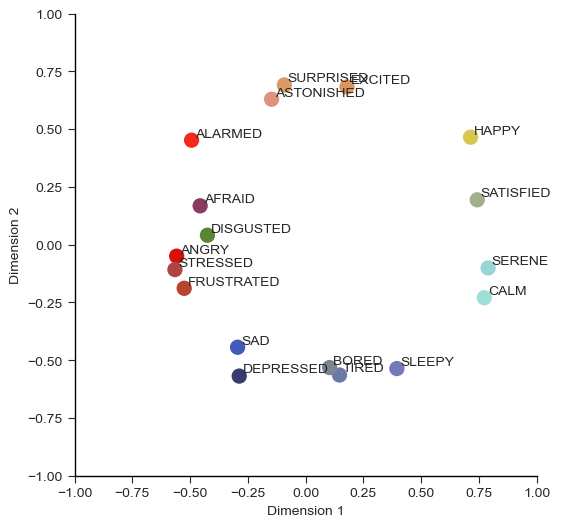

In [6]:
## Figure 5A.

fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_embedding[:,0], emotion_embedding[:,1], c=d1.average_emotion_color_rgb_matrix[select_emotions(1)])

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

#annotate each point with emotion
ax.set_aspect('equal')

for i in range(0, len(d.emotion)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (emotion_embedding[i, 0], emotion_embedding[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
plt.savefig('../figures/5A.svg', dpi=600)

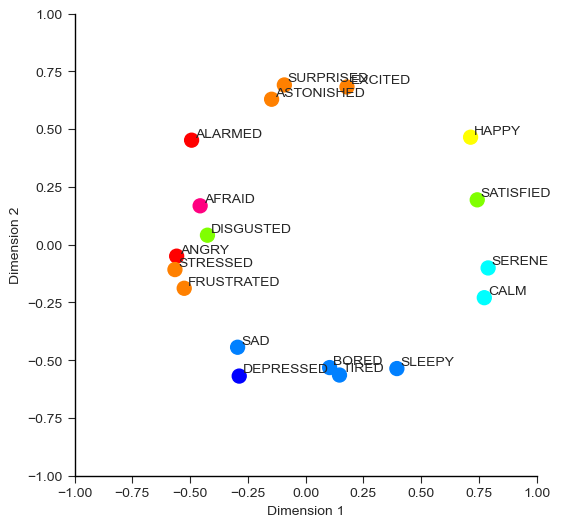

In [7]:
## Figure 5B

prototype_color_indices = closest_color(d1.average_emotion_color_rgb_matrix[select_emotions(1)], d.color_values)

fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_embedding[:,0], emotion_embedding[:,1], c=d.color_values[prototype_color_indices])

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')

#annotate each point with emotion
ax.set_aspect('equal')

for i in range(0, len(d.emotion)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (emotion_embedding[i, 0], emotion_embedding[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
plt.savefig('../figures/5B.svg', dpi=600)

In [8]:
hsl_color_values = convert_array_to_hsl(d1.average_emotion_color_rgb_matrix[select_emotions(1)])

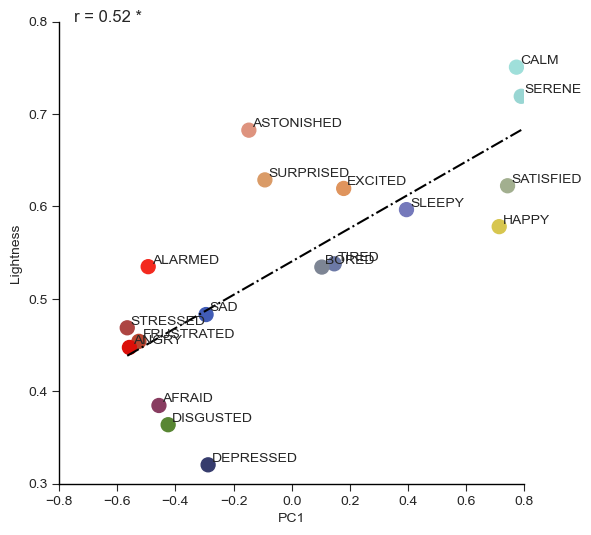

In [9]:
## Fig 5C.
# fit a line
lightness = hsl_color_values[:,2]
dimension1 = emotion_embedding[:,0]
coef = np.polyfit(dimension1,lightness, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(dimension1,lightness)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(dimension1,lightness, c=d1.average_emotion_color_rgb_matrix[select_emotions(1)])
plotx = np.linspace(np.min(dimension1),np.max(dimension1),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d.emotion)):

    x = d.emotion[i]

    plt.annotate(str(x),
                 (dimension1[i], lightness[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_ylabel('Lightness')
ax.set_xlabel('PC1')

ax.text(-0.75,0.8,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_ylim([0.3, 0.8])
ax.set_xlim([-0.8, 0.8])

plt.savefig('../figures/5C.svg', dpi=600)


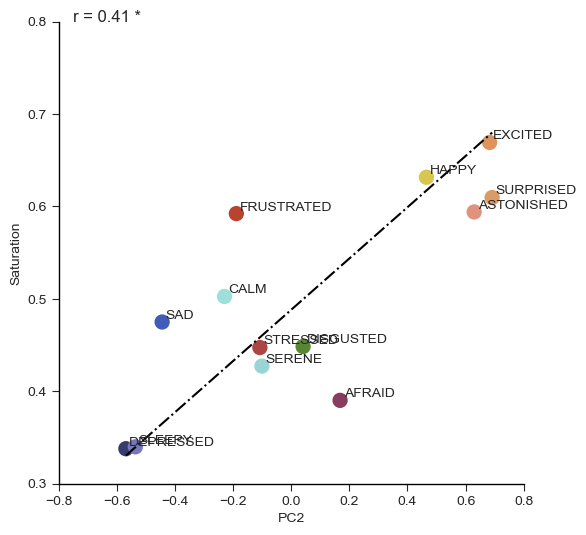

In [11]:
## Fig 5d.
# fit a line
saturation = hsl_color_values[:,1]
dimension2 = emotion_embedding[:,1]
coef = np.polyfit(dimension2,saturation, deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(dimension2,saturation)

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(dimension2,saturation, c=d1.average_emotion_color_rgb_matrix[select_emotions(1)])
plotx = np.linspace(np.min(dimension2),np.max(dimension2),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d.emotion)):

    x = d.emotion[i]

    plt.annotate(str(x),
                 (dimension2[i], saturation[i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_ylabel('Saturation')
ax.set_xlabel('PC2')

ax.text(-0.75,0.8,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_ylim([0.3, 0.8])
ax.set_xlim([-0.8, 0.8])

plt.savefig('../figures/5D.svg', dpi=600)


### Self Reported Confidence with Neutral Emotions

In [12]:
## load emotion and color data from experiment two
d2 = DataLoader(context=2, location='../data/behavioral/processeddata/2/')
d2.load_color()
d2.load_emotion()
d2.load_emotion_color_association()

In [13]:
## reduce the similarity matrix to 2 dimensions
color_embedding_neutral = reduce_dimensions(d2.average_color_matrix, 2)
emotion_embedding_neutral = reduce_dimensions(d2.average_emotion_matrix, 2)

In [17]:
_, _, emotion_center_distances_neutral, _, _ = circle_fitting_and_regression(emotion_embedding_neutral, color_embedding_neutral, d2.average_emotion_color_ranking_matrix, d2.color_values) # we only need the distances from the emotion center

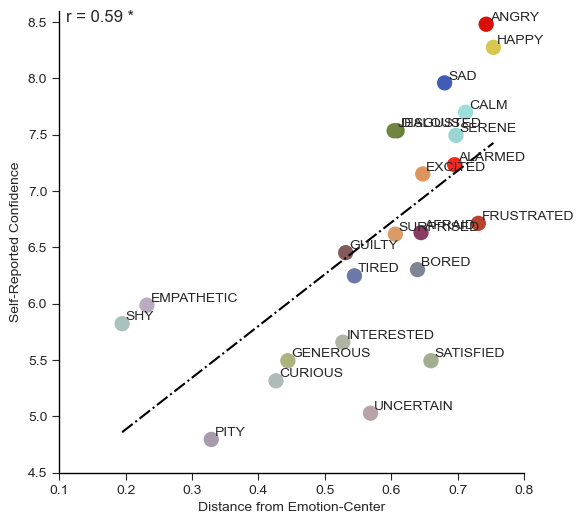

In [30]:
# FIG 5E

# fit a line
coef = np.polyfit(emotion_center_distances_neutral, d1.reported_confidence[select_emotions(2)], deg=1)
poly1d_fn = np.poly1d(coef)

# find out the correlation
r,p = kendalltau(emotion_center_distances_neutral, d1.reported_confidence[select_emotions(2)])

# plot
fig,ax = plt.subplots(figsize=(6,6))
plt.scatter(emotion_center_distances_neutral, d1.reported_confidence[select_emotions(2)], c=d1.average_emotion_color_rgb_matrix[select_emotions(2)])
plotx = np.linspace(np.min(emotion_center_distances_neutral),np.max(emotion_center_distances_neutral),15)
ax.plot(plotx,poly1d_fn(plotx),'k-.')
for i in range(0, len(d2.emotion)):

    x = d2.emotion[i]

    plt.annotate(str(x),
                 (emotion_center_distances_neutral[i], d1.reported_confidence[select_emotions(2)][i]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=10)
ax.set_ylabel('Self-Reported Confidence')
ax.set_xlabel('Distance from Emotion-Center')

ax.text(0.11,8.5,'r = %.2f %s'%(r,set_significance(p)),fontdict={'size':12})
ax.set_xlim([0.1, 0.8])
ax.set_ylim([4.5, 8.6])

plt.savefig('../figures/5E.svg', dpi=600)